Import the needed packages and read the csv file using pandas.

In [134]:
import pandas as pd
import matplotlib.pyplot as plt

In [144]:
data=pd.read_csv("Congress_White_House.csv")
data

,Employee Name,Employee Status,Salary,Pay Basis,Position Title
0,"Abrams, Adam W.",Employee,66300.0,Per Annum,WESTERN REGIONAL COMMUNICATIONS DIRECTOR
1,"Adams, Ian H.",Employee,45000.0,Per Annum,EXECUTIVE ASSISTANT TO THE DIRECTOR OF SCHEDUL...
2,"Agnew, David P.",Employee,93840.0,Per Annum,DEPUTY DIRECTOR OF INTERGOVERNMENTAL AFFAIRS
3,"Albino, James",Employee,91800.0,Per Annum,SENIOR PROGRAM MANAGER
4,"Aldy, Jr., Joseph E.",Employee,130500.0,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT FOR ENERGY ...
...,...,...,...,...,...
464,"Young, Jr., Reginald D.",Employee,60232.0,Per Annum,RECORDS MANAGEMENT ANALYST
465,"Young, Katherine H.",Employee,42000.0,Per Annum,STAFF ASSISTANT
466,"Young, Latoya A.",Employee,58511.0,Per Annum,RECORDS MANAGEMENT ANALYST
467,"Zelman, Allison L.",Employee,50000.0,Per Annum,POLICY ASSISTANT


Mean, Max, and Min

In [136]:
salMean=data["Salary"].mean()
salMax=data["Salary"].max()
salMin=data["Salary"].min()

In [137]:
print('Average Salary: ' + str(salMean) + '\nMax Salary: ' + str(salMax) + 
      '\nMin Salary: ' + str(salMin))

Average Salary: 82721.33688699361
Max Salary: 179700.0
Min Salary: 0.0


There appears to be 3 lines where the salary is listed as 0.
I will be assuming this is an error, and removing them.

In [138]:
data[data["Salary"] == 0]

,Employee Name,Employee Status,Salary,Pay Basis,Position Title
66,"Chen, Margaret C.",Employee,0.0,Per Annum,SPECIAL ASSISTANT
277,"McGinnis, Patricia G.",Employee,0.0,Per Annum,ADVISOR
461,"Wong, Shale L.",Employee,0.0,Per Annum,POLICY ADVISOR


As you can see in the code below, the missing values have been removed allowing for the accurate mean and minimum to display. I will be using this new data set going forward.

In [139]:
dataTwo=data[data["Salary"] != 0]
salMean=dataTwo["Salary"].mean()
salMax=dataTwo["Salary"].max()
salMin=dataTwo["Salary"].min()
print('Average Salary: ' + str(salMean) + '\nMax Salary: ' + str(salMax) + 
      '\nMin Salary: ' + str(salMin))

Average Salary: 83253.87768240343
Max Salary: 179700.0
Min Salary: 21000.0


As you can see below, simply plotitng the data does not give us any insight into the spread.

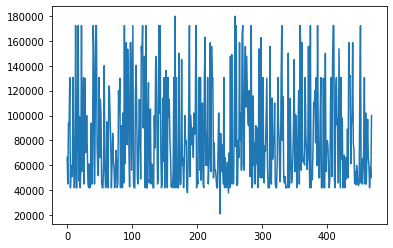

In [140]:
sal=dataTwo["Salary"]
sal.plot()

By sorting the data by salary range we can make sense of the distribution more easily

In [141]:
ranges = [0,25000,50000,75000,100000,125000,150000,175000,200000]
salBracket=pd.DataFrame(sal.groupby(pd.cut(sal, ranges)).count()).rename(columns={"Salary": "Number Employed"})
salBracket

,Number Employed
Salary,
"(0, 25000]",1
"(25000, 50000]",144
"(50000, 75000]",114
"(75000, 100000]",67
"(100000, 125000]",40
"(125000, 150000]",54
"(150000, 175000]",44
"(175000, 200000]",2


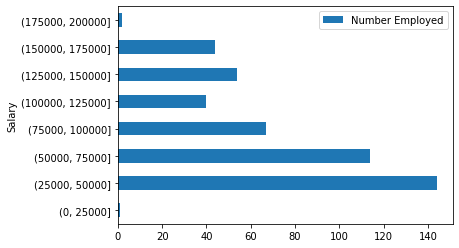

In [142]:
salBracket.plot.barh(rot=0)